[https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data?resource=download]

In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [16]:

df = pd.read_csv("jobs_in_data.csv")

df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [57]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size',
       'salary_in_eur'],
      dtype='object')

In [17]:



def get_exchange_rate(coinI, coinF):
    url = f"https://www.google.com/finance/quote/{coinI}-{coinF}"

    try:
        # Make the request to the website
        response = requests.get(url)
        response.raise_for_status()

        # Parse the HTML content
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the exchange rate from the page
        exchange_rate_element = soup.find("div", {"class": "YMlKec fxKbKc"})
        exchange_rate = exchange_rate_element.text.strip()
        if exchange_rate is not None:
            print(f"The current exchange rate between {coinI}-{coinF} is: {exchange_rate}")
        return exchange_rate

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [18]:
# df["salary_in_eur"] = df["salary_in_usd"] * float(exchange_rate)

In [19]:
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


<Axes: ylabel='salary_currency'>

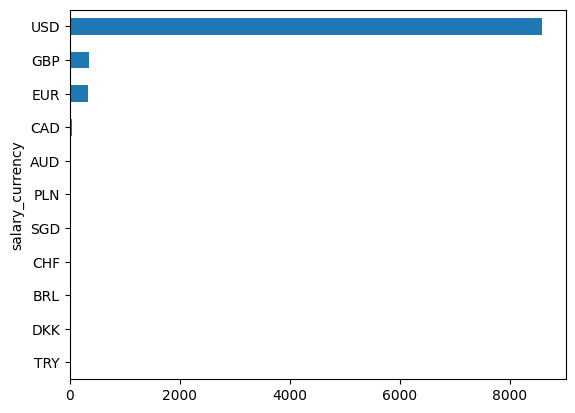

In [20]:
df["salary_currency"].value_counts().sort_values().plot(kind="barh")

In [33]:
currencies = df["salary_currency"].unique()

In [34]:
# currencies = currencies[currencies != "EUR"]

In [35]:
def get_exchange_rates(coin, currencies):
    currencies = currencies[currencies != coin]
    exchange_rates = {coin: 1.00}
    for currency in currencies:
        exchange_rates[currency] = float(get_exchange_rate(currency, coin))
        
    return exchange_rates

In [39]:
exchange_rates_eur = get_exchange_rates("EUR", currencies)
print("\n")
exchange_rates_usd = get_exchange_rates("USD", currencies)

The current exchange rate between USD-EUR is: 0.9135
The current exchange rate between GBP-EUR is: 1.1538
The current exchange rate between CAD-EUR is: 0.6854
The current exchange rate between AUD-EUR is: 0.6173
The current exchange rate between PLN-EUR is: 0.2289
The current exchange rate between BRL-EUR is: 0.1855
The current exchange rate between TRY-EUR is: 0.0307
The current exchange rate between CHF-EUR is: 1.0748
The current exchange rate between SGD-EUR is: 0.6885
The current exchange rate between DKK-EUR is: 0.1341


The current exchange rate between EUR-USD is: 1.0947
The current exchange rate between GBP-USD is: 1.2631
The current exchange rate between CAD-USD is: 0.7502
The current exchange rate between AUD-USD is: 0.6763
The current exchange rate between PLN-USD is: 0.2507
The current exchange rate between BRL-USD is: 0.2031
The current exchange rate between TRY-USD is: 0.0336
The current exchange rate between CHF-USD is: 1.1766
The current exchange rate between SGD-USD is

In [40]:
df["salary_in_eur"] = df["salary"] * df["salary_currency"].map(exchange_rates_eur)
df["salary_in_usd"] = df["salary"] * df["salary_currency"].map(exchange_rates_usd)

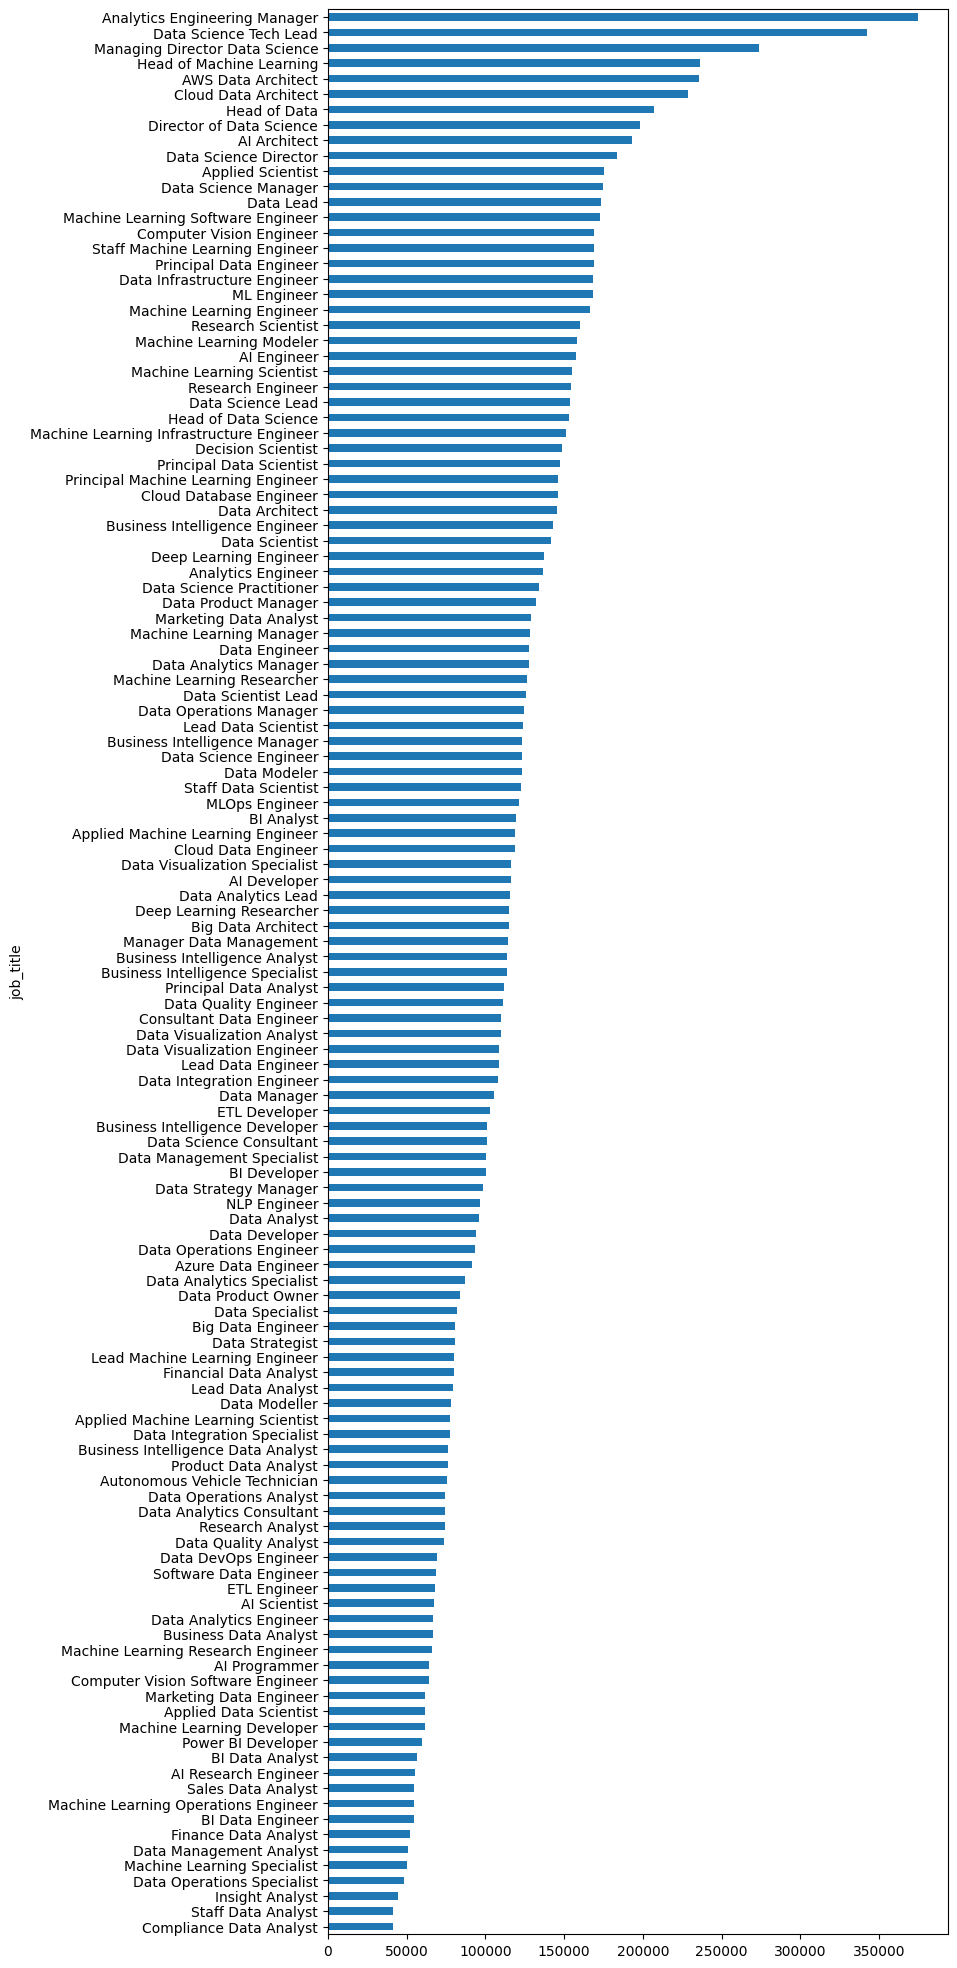

In [51]:
figure, ax = plt.subplots(figsize=(8,25))
salaries = df.groupby("job_title")["salary_in_eur"].median().sort_values().plot(ax=ax, kind="barh")


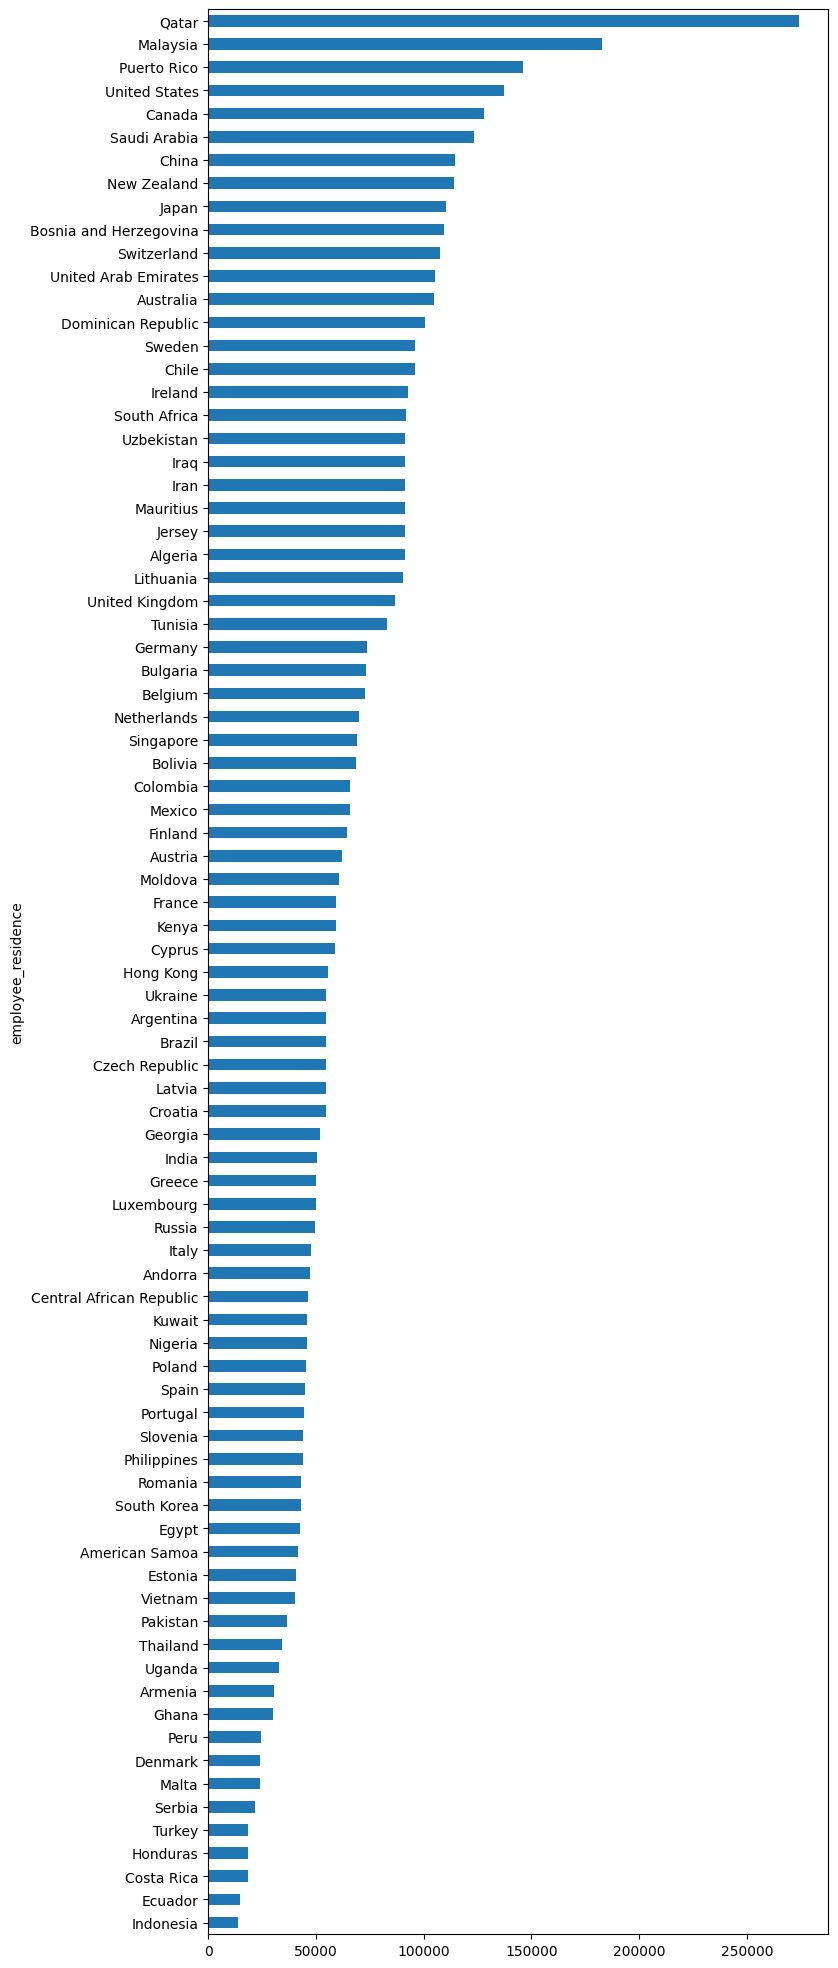

In [59]:
figure, ax = plt.subplots(figsize=(8,25))
salaries = df.groupby("employee_residence")["salary_in_eur"].median().sort_values().plot(ax=ax, kind="barh")

In [55]:
filtered_df = df[df["employee_residence"] == "Brazil"]
filtered_df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_in_eur
2917,2023,MLOps Engineer,Machine Learning and AI,BRL,140400,28515.24,Brazil,Mid-level,Full-time,Remote,Brazil,L,26044.2
2971,2023,Data Engineer,Data Engineering,USD,72000,72000.00,Brazil,Senior,Full-time,Remote,Brazil,M,65772.0
2972,2023,Data Engineer,Data Engineering,USD,60000,60000.00,Brazil,Senior,Full-time,Remote,Brazil,M,54810.0
3013,2023,Head of Data,Leadership and Management,USD,115000,115000.00,Brazil,Executive,Full-time,Remote,Brazil,M,105052.5
3014,2023,Head of Data,Leadership and Management,USD,110000,110000.00,Brazil,Executive,Full-time,Remote,Brazil,M,100485.0
